## Project II - Regression Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'reg', 'low fat'],['LF', 'REG', 'REG', 'LF'])

In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [5]:
avg = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace = True)

In [6]:
df['Outlet_Size'].fillna(value='Medium', inplace = True)

In [7]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   float64 
 1   Item_Fat_Content           8523 non-null   object  
 2   Item_Visibility            8523 non-null   float64 
 3   Item_Type                  8523 non-null   object  
 4   Item_MRP                   8523 non-null   float64 
 5   Outlet_Establishment_Year  8523 non-null   category
 6   Outlet_Size                8523 non-null   object  
 7   Outlet_Location_Type       8523 non-null   object  
 8   Outlet_Type                8523 non-null   object  
 9   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(4), object(5)
memory usage: 608.1+ KB


In [9]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [10]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1,1)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## 43

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 44

In [15]:
print(lm.intercept_)
print(lm.coef_)

[-1451.81835727]
[[-1.82475271e+00 -4.64561965e+02  1.56605000e+01  4.48765296e+01
  -2.75085038e+01  7.04717332e+01  2.49489933e+01 -8.95196806e+01
  -1.11735937e+01  4.48118779e+01  6.85408479e+00  1.37640807e+01
  -1.44180864e+01 -4.71658004e-01 -4.52560547e+01  2.29486220e+02
  -9.95853188e+00 -2.87191941e+01  2.26174204e+01 -8.01727628e+01
   7.70328696e+02 -1.39689474e+03  1.39439945e+02 -2.71218282e+02
   6.71655441e+02 -1.39696316e+02  1.20817356e+02  4.16813658e+02
  -3.36640895e+02  2.60740843e+02  6.08115548e+02  1.09033672e+03
   1.20817356e+02  1.96436570e+03]]


## 45

In [16]:
predicted = lm.predict(X_test)
predicted

array([[1360.89235678],
       [ 707.29096973],
       [ 877.39802051],
       ...,
       [ 849.13294299],
       [ 567.01865675],
       [1704.18406304]])

In [17]:
from sklearn import metrics

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R2:', metrics.r2_score(y_test, predicted))

MAE: 792.0247141085214
MSE: 1143541.2997210394
RMSE: 1069.3649048482184
R2: 0.5792664114419414


## 46

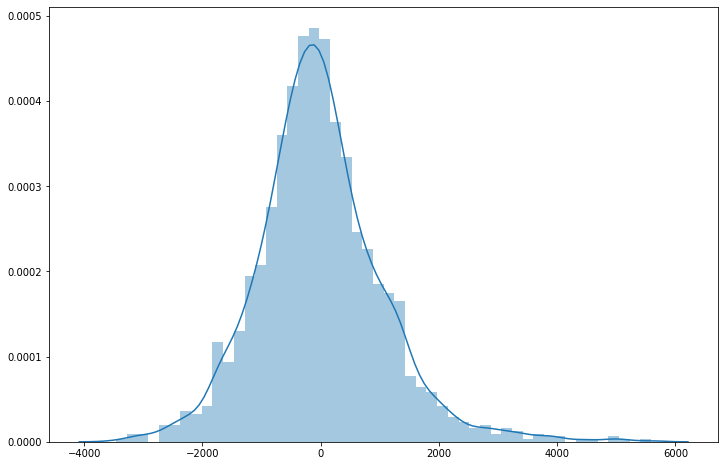

In [19]:
fig=plt.figure(figsize=(12,8))
sns.distplot((y_test-predicted), bins=50)

## 47

In [20]:
dict_compare = {'Sales': y_test.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,1743.0644,1360.892357
1,356.8688,707.290970
2,377.5086,877.398021
3,5778.4782,4229.688222
4,2356.9320,3347.409809
...,...,...
1700,3004.0896,2033.635247
1701,890.8404,2167.217211
1702,629.1810,849.132943
1703,253.0040,567.018657


In [21]:
print(df_predicted.to_string())

           Sales    Predicted
0      1743.0644  1360.892357
1       356.8688   707.290970
2       377.5086   877.398021
3      5778.4782  4229.688222
4      2356.9320  3347.409809
5       865.5400   638.038225
6      4613.9940  4753.509603
7      2410.8618  2048.240346
8      1948.1308  1393.245270
9      1937.4780  2786.414544
10      210.3928  -241.304338
11      255.0014  2118.996057
12     4541.4218  3899.886603
13      657.8104   963.964233
14      578.5802   753.154411
15     4229.1616  4347.210613
16     1267.0174  1788.484572
17     2388.8904  1827.070012
18     1797.6600  1968.761748
19     4447.5440  3240.727847
20     2570.6538  3092.965852
21     1779.6834  2708.384867
22     4211.1850  2851.623435
23     3912.2408  2504.993394
24     2366.9190  4198.047755
25     1298.3100  2265.213294
26      149.8050   708.256694
27     3916.2356  3789.044082
28     2065.3116  3151.124443
29     3029.3900  3882.952786
30      788.3072   815.594271
31     2566.6590  2750.496492
32      57

## 48

In [22]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.761381
Predicted,0.761381,1.000000


In [23]:
## Linear Regression ไม่จำเป็นต้องทำ Standardization